In [ ]:
import cv2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


video1 =cv2.VideoCapture(0)
video2 =cv2.VideoCapture(1)

while True:
    ret0,frame0 = video1.read()
    ret1,frame1 = video2.read()

    if (ret0):
        cv2.imshow('Camera 0',frame0)

    if (ret1):
        cv2.imshow('Camera 1',frame1)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video1.release()
video2.release()

cv2.destroyAllWindows()

In [4]:

import cv2
import pandas as pd
import numpy as np
from ultralytics import YOLO
from tracker import *


model=YOLO('yolov8s.pt')
#signal counter
def signal_counter(count_car):
    if count_car == 0:
        pass
    else:
        number_of_cars = count_car
        mean_time_headway = 30/number_of_cars
        flow_rate = 3600/mean_time_headway
        Amber = 2
 

        approach_width = 4

        saturation_flow = 525*approach_width

        Y_ratio = saturation_flow/flow_rate


        critical_Y_ratio = Y_ratio

        number_of_phases = 2

        time_loss = 2

        all_red = 4

        loss_time_per_cycle = number_of_phases*time_loss + all_red


        Total_cycle_length = (1.5*loss_time_per_cycle + 5)/(1-critical_Y_ratio)

        green_signal_nb  = round(abs( Y_ratio/critical_Y_ratio *(Total_cycle_length-loss_time_per_cycle)))

        red_signal_nb = Total_cycle_length - green_signal_nb - Amber
    

        return green_signal_nb


def RGB(event, x, y, flags, param):
    if event == cv2.EVENT_MOUSEMOVE :  
        colorsBGR = [x, y]
        print(colorsBGR)
        

cv2.namedWindow('RGB')
cv2.setMouseCallback('RGB',RGB)

video1 =cv2.VideoCapture(0)
video2 =cv2.VideoCapture(1)
video3 = cv2.VideoCapture(2)
my_file = open("coco.txt", "r")
data = my_file.read()
class_list = data.split("\n")
print(class_list)
count=0
tracker = Tracker()

car_entering = {}

count_car1 = set()
count_car2 = set()
count_car3 = set()


area3 = [(979,332),(605,270),(623,249),(986,301)]
area2 = [(979,332),(605,270),(623,249),(986,301)]
area1 = [(979,332),(545,240),(573,219),(986,301)]
while True:
    
    ret0,frame0 = video1.read()
    ret1,frame1 = video2.read()
    ret2,frame2 = video3.read()

    if not ret0:
        break
    count += 1
    if count % 0.5 != 0:
        continue
    frame0=cv2.resize(frame0,(1020,500))
    frame1=cv2.resize(frame1,(1020,500))
    frame2 = cv2.resize(frame2,(1020,500))
    

    results1=model.predict(frame0)
    results2 = model.predict(frame1)
    results3 = model.predict(frame2)

    a=results1[0].boxes.data
    b=results2[0].boxes.data
    c=results3[0].boxes.data
    px = pd.DataFrame(a).astype('float')
    py = pd.DataFrame(b).astype('float')
    pz = pd.DataFrame(c).astype('float')
    list1 = []
    list2 = []
    list3 = []
    #webcam1
    for index,row in px.iterrows():
        x1=int(row[0])
        y1=int(row[1])
        x2=int(row[2])
        y2=int(row[3])
        d=int(row[5])
        c=class_list[d]
        '''if 'car' in c:
            result = cv2.pointPolygonTest(np.array(area,np.int32),((x1,y2)),False)
            if result >= 0:
                cv2.rectangle(frame,(x1,y1),(x2,y2),(0,0,255),2)
                cv2.circle(frame,(x1,y2),4,(2555,0,0),-1)
                cv2.putText(frame,str(c),(x1,y1),cv2.FONT_HERSHEY_COMPLEX,(0.5),(255,255,255))'''
        if 'car' in c:
           list1.append([x1,y1,x2,y2])
    bbox_id = tracker.update(list1)
    for bbox in bbox_id:
        x3,y3,x4,y4,id = bbox
        result=cv2.pointPolygonTest(np.array(area1,np.int32),((x4,y4)),False)
        if result >= 0:
            car_entering[id]=(x4,y4)
            cv2.rectangle(frame0,(x3,y3),(x4,y4),(0,255,0),2)
            cv2.circle(frame0,(x4,y4),5,(2555,0,0),-1)
            cv2.putText(frame0,str(id),(x3,y3),cv2.FONT_HERSHEY_COMPLEX,(0.5),(255,255,255))
            count_car1.add(id)
    number = len(count_car1) 
    cv2.putText(frame0,('Number of Cars: ')+ str(number),(60,40),cv2.FONT_HERSHEY_COMPLEX,0.8,(0,255,255),2)
    cv2.putText(frame0,('Green Light =')+ str(signal_counter(number))+('s'),(60,80),cv2.FONT_HERSHEY_COMPLEX,0.8,(0,255,255),2)
 
    #webcam2
    for index,row in py.iterrows():
        x1=int(row[0])
        y1=int(row[1])
        x2=int(row[2])
        y2=int(row[3])
        d=int(row[5])
        c=class_list[d]
        '''if 'car' in c:
            result = cv2.pointPolygonTest(np.array(area,np.int32),((x1,y2)),False)
            if result >= 0:
                cv2.rectangle(frame,(x1,y1),(x2,y2),(0,0,255),2)
                cv2.circle(frame,(x1,y2),4,(2555,0,0),-1)
                cv2.putText(frame,str(c),(x1,y1),cv2.FONT_HERSHEY_COMPLEX,(0.5),(255,255,255))'''
        if 'car' in c:
           list2.append([x1,y1,x2,y2])
    cbox_id = tracker.update(list2)
    for bbox in cbox_id:
        x3,y3,x4,y4,id = bbox
        result=cv2.pointPolygonTest(np.array(area2,np.int32),((x4,y4)),False)
        if result >= 0:
            car_entering[id]=(x4,y4)
            cv2.rectangle(frame1,(x3,y3),(x4,y4),(0,255,0),2)
            cv2.circle(frame1,(x4,y4),5,(2555,0,0),-1)
            cv2.putText(frame1,str(id),(x3,y3),cv2.FONT_HERSHEY_COMPLEX,(0.5),(255,255,255))
            count_car2.add(id) 
    number = len(count_car2) 
    cv2.putText(frame1,('Number of Cars: ')+ str(number),(60,40),cv2.FONT_HERSHEY_COMPLEX,0.8,(0,255,255),2)
    cv2.putText(frame1,('Green Light =')+ str(signal_counter(number))+('s'),(60,80),cv2.FONT_HERSHEY_COMPLEX,0.8,(0,255,255),2)
    #webcam3
    for index,row in pz.iterrows():
        x1=int(row[0])
        y1=int(row[1])
        x2=int(row[2])
        y2=int(row[3])
        d=int(row[5])
        c=class_list[d]
        '''if 'car' in c:
            result = cv2.pointPolygonTest(np.array(area,np.int32),((x1,y2)),False)
            if result >= 0:
                cv2.rectangle(frame,(x1,y1),(x2,y2),(0,0,255),2)
                cv2.circle(frame,(x1,y2),4,(2555,0,0),-1)
                cv2.putText(frame,str(c),(x1,y1),cv2.FONT_HERSHEY_COMPLEX,(0.5),(255,255,255))'''
        if 'car' in c:
           list3.append([x1,y1,x2,y2])
    dbox_id = tracker.update(list3)
    for bbox in dbox_id:
        x3,y3,x4,y4,id = bbox
        result=cv2.pointPolygonTest(np.array(area3,np.int32),((x4,y4)),False)
        if result >= 0:
            car_entering[id]=(x4,y4)
            cv2.rectangle(frame2,(x3,y3),(x4,y4),(0,255,0),2)
            cv2.circle(frame2,(x4,y4),5,(2555,0,0),-1)
            cv2.putText(frame2,str(id),(x3,y3),cv2.FONT_HERSHEY_COMPLEX,(0.5),(255,255,255))
            count_car3.add(id) 
    number = len(count_car3) 
    cv2.putText(frame2,('Number of Cars: ')+ str(number),(60,40),cv2.FONT_HERSHEY_COMPLEX,0.8,(0,255,255),2)
    cv2.putText(frame2,('Green Light =')+ str(signal_counter(number))+('s'),(60,80),cv2.FONT_HERSHEY_COMPLEX,0.8,(0,255,255),2)

        
    cv2.polylines(frame0,[np.array(area1,np.int32)],True,(255,0,255),2) 
    cv2.polylines(frame1,[np.array(area2,np.int32)],True,(255,0,255),2)
    cv2.polylines(frame2,[np.array(area3,np.int32)],True,(255,0,255),2)

    #print out number of cars
    ''' print('The number of cars from camera 1 is ' + str(len(count_car1)))
    print('Green Light = ' + str(signal_counter(count_car1)))    
    
    print('The number of cars from camera 2 is ' + str(len(count_car2)))
    print('Green Light = ' + str(signal_counter(count_car1)))
    
    print('The number of cars from camera 3 is ' + str(len(count_car3)))
    print('Green Light = ' + str(signal_counter(count_car1)))'''

    if (ret0):
        cv2.imshow('Camera 0',frame0)

    if (ret1):
        cv2.imshow('Camera 1',frame1)

    if (ret2):
        cv2.imshow('Camera 2',frame2)

    if cv2.waitKey(1)&0xFF== ord('q'):
        break




video1.release()
video2.release()
video3.release()
cv2.destroyAllWindows()

number_of_cars_lane1 = len(count_car1)
number_of_cars_lane2 = len(count_car2)
number_of_cars_lane3 = len(count_car3)


































['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [14]:
#code 2
import cv2
import pandas as pd
import numpy as np
from ultralytics import YOLO
from tracker import *
import serial.tools.list_ports
import time

ports = serial.tools.list_ports.comports()

serialInst = serial.Serial()

portsList = []

for one in ports:
    portsList.append(str(one))
    print(str(one))


com = input("Select comports for Arduino")


for i in range((len(portsList))):
    if portsList[i].startswith('COM'+str(com)):
        use = "COM" + str(com)
        print(use)

serialInst.baudrate = 9600
serialInst.port = use
serialInst.open()


model = YOLO('yolov8s.pt')

# signal counter
def signal_counter(count_car):
    if count_car == 0:
        return 0
    number_of_cars = count_car
    mean_time_headway = 30 / number_of_cars
    flow_rate = 3600 / mean_time_headway
    Amber = 2

    approach_width = 4
    saturation_flow = 525 * approach_width
    Y_ratio = saturation_flow / flow_rate

    critical_Y_ratio = Y_ratio
    number_of_phases = 2
    time_loss = 2
    all_red = 4
    loss_time_per_cycle = number_of_phases * time_loss + all_red

    Total_cycle_length = (1.5 * loss_time_per_cycle + 5) / (1 - critical_Y_ratio)
    green_signal_nb = round(abs(Y_ratio / critical_Y_ratio * (Total_cycle_length - loss_time_per_cycle)))
    red_signal_nb = Total_cycle_length - green_signal_nb - Amber

    return green_signal_nb

def detect_white(frame, x1, y1, x2, y2, min_area_threshold=500):
        car_roi = frame[y1:y2, x1:x2]
        hsv_image = cv2.cvtColor(car_roi, cv2.COLOR_BGR2HSV)

        # Define white color range in HSV
        lower_white1 = np.array([0, 100, 20], dtype=np.uint8)
        upper_white1 = np.array([10, 255, 255], dtype=np.uint8)

        lower_white2 = np.array([160, 100, 20], dtype=np.uint8)
        upper_white2 = np.array([179, 255, 255], dtype=np.uint8)

        # Create a mask for white color
        white_mask1 = cv2.inRange(hsv_image, lower_white1, upper_white1)
        white_mask2 = cv2.inRange(hsv_image, lower_white2, upper_white2)
        white_mask = white_mask1 + white_mask2

        # Find contours in the mask
        contours, _ = cv2.findContours(white_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Iterate through the contours and filter based on area
        for contour in contours:
            area = cv2.contourArea(contour)
            if area > min_area_threshold:
                return True

        return False

def RGB(event, x, y, flags, param):
    if event == cv2.EVENT_MOUSEMOVE:
        colorsBGR = [x, y]
        print(colorsBGR)

cv2.namedWindow('RGB')
cv2.setMouseCallback('RGB', RGB)

video1 = cv2.VideoCapture(0)
video2 = cv2.VideoCapture(1)
video3 = cv2.VideoCapture(2)
my_file = open("coco.txt", "r")
data = my_file.read()
class_list = data.split("\n")
print(class_list)
count = 0
tracker = Tracker()

car_entering = {}

count_car1 = set()
count_car2 = set()
count_car3 = set()

area3 = [(979, 332), (605, 270), (623, 249), (986, 301)]
area2 = [(979, 332), (605, 270), (623, 249), (986, 301)]
area1 = [(979, 332), (545, 240), (573, 219), (986, 301)]

while True:
    ret0, frame0 = video1.read()
    ret1, frame1 = video2.read()
    #ret2, frame2 = video3.read()

    if not ret0:
        break
    count += 1
    if count % 10 != 0:
        continue

    frame0 = cv2.resize(frame0, (1020, 500))
    frame1 = cv2.resize(frame1, (1020, 500))
    #frame2 = cv2.resize(frame2, (1020, 500))

    results1 = model.predict(frame0)
    results2 = model.predict(frame1)
    #results3 = model.predict(frame2)

    a = results1[0].boxes.data
    b = results2[0].boxes.data
    #c = results3[0].boxes.data
    px = pd.DataFrame(a).astype('float')
    py = pd.DataFrame(b).astype('float')
    #pz = pd.DataFrame(c).astype('float')
    list1 = []
    list2 = []
    list3 = []

    # webcam1
    white_car_detected1 = False
    for index, row in px.iterrows():
        x1 = int(row[0])
        y1 = int(row[1])
        x2 = int(row[2])
        y2 = int(row[3])
        d = int(row[5])
        c = class_list[d]
        if 'car' in c:
            list1.append([x1, y1, x2, y2])
            if detect_white(frame0, x1, y1, x2, y2):
                white_car_detected1 = True

    if white_car_detected1:
        cv2.putText(frame0, 'Emergency Car detected:', (60, 40), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 255, 255), 2)
        cv2.putText(frame0, 'Green Light = 20s', (60, 80), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 255, 255), 2)
        command = "T2-" + str(20)
        time.sleep(2)
        serialInst.write(command.encode('utf-8'))
    else:
        bbox_id = tracker.update(list1)
        for bbox in bbox_id:
            x3, y3, x4, y4, id = bbox
            result = cv2.pointPolygonTest(np.array(area1, np.int32), ((x4, y4)), False)
            if result >= 0:
                car_entering[id] = (x4, y4)
                cv2.rectangle(frame0, (x3, y3), (x4, y4), (0, 255, 0), 2)
                cv2.circle(frame0, (x4, y4), 5, (2555, 0, 0), -1)
                cv2.putText(frame0, str(id), (x3, y3), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255, 255, 255))
                count_car1.add(id)
        number = len(count_car1)
        timing = signal_counter(number)
        cv2.putText(frame0, 'Number of Cars: ' + str(number), (60, 40), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 255, 255), 2)
        cv2.putText(frame0, 'Green Light = ' + str(signal_counter(number)) + 's', (60, 80), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 255, 255), 2)
        command = "T2-" + str(timing)
        time.sleep(2)
        serialInst.write(command.encode('utf-8'))


    # webcam2
    white_car_detected2 = False
    for index, row in py.iterrows():
        x1 = int(row[0])
        y1 = int(row[1])
        x2 = int(row[2])
        y2 = int(row[3])
        d = int(row[5])
        c = class_list[d]
        if 'car' in c:
            list2.append([x1, y1, x2, y2])
            if detect_white(frame1, x1, y1, x2, y2):
                white_car_detected2 = True

    if white_car_detected2:
        cv2.putText(frame1, 'Emergency Car detected:', (60, 40), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 255, 255), 2)
        cv2.putText(frame1, 'Green Light = 20s', (60, 80), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 255, 255), 2)
        command = "T1-" + str(20)
        time.sleep(2)
        serialInst.write(command.encode('utf-8'))
    else:
        cbox_id = tracker.update(list2)
        for bbox in cbox_id:
            x3, y3, x4, y4, id = bbox
            result = cv2.pointPolygonTest(np.array(area2, np.int32), ((x4, y4)), False)
            if result >= 0:
                car_entering[id] = (x4, y4)
                cv2.rectangle(frame1, (x3, y3), (x4, y4), (0, 255, 0), 2)
                cv2.circle(frame1, (x4, y4), 5, (2555, 0, 0), -1)
                cv2.putText(frame1, str(id), (x3, y3), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255, 255, 255))
                count_car2.add(id)
        number = len(count_car2)
        timing = signal_counter(number)
        cv2.putText(frame1, 'Number of Cars: ' + str(number), (60, 40), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 255, 255), 2)
        cv2.putText(frame1, 'Green Light = ' + str(signal_counter(number)) + 's', (60, 80), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 255, 255), 2)
        command = "T1-" + str(timing)
        time.sleep(2)
        serialInst.write(command.encode('utf-8'))

    # webcam3
    '''white_car_detected3 = False
    for index, row in pz.iterrows():
        x1 = int(row[0])
        y1 = int(row[1])
        x2 = int(row[2])
        y2 = int(row[3])
        d = int(row[5])
        c = class_list[d]
        if 'car' in c:
            list3.append([x1, y1, x2, y2])
            if detect_white(frame2, x1, y1, x2, y2):
                white_car_detected3 = True

    if white_car_detected3:
        cv2.putText(frame2, 'Emergency Car detected:', (60, 40), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 255, 255), 2)
        cv2.putText(frame2, 'Green Light = 20s', (60, 80), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 255, 255), 2)
    else:
        dbox_id = tracker.update(list3)
        for bbox in dbox_id:
            x3, y3, x4, y4, id = bbox
            result = cv2.pointPolygonTest(np.array(area3, np.int32), ((x4, y4)), False)
            if result >= 0:
                car_entering[id] = (x4, y4)
                cv2.rectangle(frame2, (x3, y3), (x4, y4), (0, 255, 0), 2)
                cv2.circle(frame2, (x4, y4), 5, (2555, 0, 0), -1)
                cv2.putText(frame2, str(id), (x3, y3), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255, 255, 255))
                count_car3.add(id)
        number = len(count_car3)
        cv2.putText(frame2, 'Number of Cars: ' + str(number), (60, 40), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 255, 255), 2)
        cv2.putText(frame2, 'Green Light = ' + str(signal_counter(number)) + 's', (60, 80), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 255, 255), 2)'''

    cv2.polylines(frame0, [np.array(area1, np.int32)], True, (255, 0, 255), 2)
    cv2.polylines(frame1, [np.array(area2, np.int32)], True, (255, 0, 255), 2)
    #cv2.polylines(frame2, [np.array(area3, np.int32)], True, (255, 0, 255), 2)

    if ret0:
        cv2.imshow('Camera 0', frame0)
    if ret1:
        cv2.imshow('Camera 1', frame1)
   

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video1.release()
video2.release()
#video3.release()
cv2.destroyAllWindows()

number_of_cars_lane1 = len(count_car1)
number_of_cars_lane2 = len(count_car2)
#number_of_cars_lane3 = len(count_car3)


COM17 - USB-SERIAL CH340 (COM17)


COM17
['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']

0: 320x640 (no detections), 482.7ms
Speed: 1.1ms preprocess, 482.7ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 64

In [1]:
import cv2
import pandas as pd
import numpy as np
from ultralytics import YOLO
from tracker import *


model=YOLO('yolov8s.pt')


def RGB(event, x, y, flags, param):
    if event == cv2.EVENT_MOUSEMOVE :  
        colorsBGR = [x, y]
        print(colorsBGR)
        


cv2.namedWindow('RGB')
cv2.setMouseCallback('RGB',RGB)

cap=cv2.VideoCapture("Traffic IP Camera video (1).mp4")

my_file = open("coco.txt", "r")
data = my_file.read()   
class_list = data.split("\n")
print(class_list)
count=0
tracker = Tracker()

car_entering = {}
count_car = []
area = [(986,340),(587,260),(673,161),(1018,239)]

def signal_counter(counted_car):
    if counted_car == 0:
        pass
    else:
        number_of_cars = counted_car
        mean_time_headway = 30/number_of_cars
        flow_rate = 3600/mean_time_headway
        Amber = 2
 

        approach_width = 4

        saturation_flow = 525*approach_width

        Y_ratio = saturation_flow/flow_rate


        critical_Y_ratio = Y_ratio

        number_of_phases = 2

        time_loss = 2

        all_red = 4

        loss_time_per_cycle = number_of_phases*time_loss + all_red


        Total_cycle_length = (1.5*loss_time_per_cycle + 5)/(1-critical_Y_ratio)

        green_signal_nb  = round(abs( Y_ratio/critical_Y_ratio *(Total_cycle_length-loss_time_per_cycle)))

        red_signal_nb = Total_cycle_length - green_signal_nb - Amber

        return green_signal_nb

while True:

    ret,frame = cap.read()
    if not ret:
        break
    count += 1
    if count % 3 != 0:
        continue
    frame=cv2.resize(frame,(1020,500))
    

    results=model.predict(frame)
    a=results[0].boxes.data
    px = pd.DataFrame(a).astype('float')
    list = []
    for index,row in px.iterrows():
        x1=int(row[0])
        y1=int(row[1])
        x2=int(row[2])
        y2=int(row[3])
        d=int(row[5])
        c=class_list[d]
        '''if 'car' in c:
            result = cv2.pointPolygonTest(np.array(area,np.int32),((x1,y2)),False)
            if result >= 0:
                cv2.rectangle(frame,(x1,y1),(x2,y2),(0,0,255),2)
                cv2.circle(frame,(x1,y2),4,(2555,0,0),-1)
                cv2.putText(frame,str(c),(x1,y1),cv2.FONT_HERSHEY_COMPLEX,(0.5),(255,255,255))'''
        if 'car' in c:
           list.append([x1,y1,x2,y2])
    bbox_id = tracker.update(list)
    for bbox in bbox_id:
        x3,y3,x4,y4,id = bbox
        result=cv2.pointPolygonTest(np.array(area,np.int32),((x4,y4)),False)
        if result >= 0:
            car_entering[id]=(x4,y4)
            cv2.rectangle(frame,(x3,y3),(x4,y4),(0,255,0),2)
            cv2.circle(frame,(x4,y4),5,(2555,0,0),-1)
            cv2.putText(frame,str(id),(x3,y3),cv2.FONT_HERSHEY_COMPLEX,(0.5),(255,255,255))
            if count_car.count(id)==0:
                count_car.append(id)
        
    cv2.polylines(frame,[np.array(area,np.int32)],True,(255,0,255),2)
    print(count_car)
    number = len(count_car) 
    cv2.putText(frame,('Number of Cars: ')+ str(number),(60,40),cv2.FONT_HERSHEY_COMPLEX,0.8,(0,255,255),2)
    cv2.putText(frame,('Green Light =')+ str(signal_counter(number))+('s'),(60,80),cv2.FONT_HERSHEY_COMPLEX,0.8,(0,255,255),2)
    print('The number of cars from camera 1 is ' + str(len(count_car)))
    print('Green Light = ' + str(signal_counter(number)))    
    cv2.imshow("RGB", frame)
    if cv2.waitKey(1)&0xFF== ord('q'):
        break

    

cap.release()
cv2.destroyAllWindows()


['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']

0: 320x640 (no detections), 619.1ms
Speed: 15.6ms preprocess, 619.1ms inference, 3356.6ms postprocess per image at shape (1, 3, 320, 640)

In [5]:
model.val()

Ultralytics YOLOv8.2.3  Python-3.12.3 torch-2.3.0+cpu CPU (Intel Core(TM) i5-10500H 2.50GHz)


val: Scanning C:\Users\adebo\Downloads\project_work-main\project_work-main\datasets\coco\labels\val2017... 4952 images, 48 backgrounds, 0 corrupt: 100%|██████████| 5000/5000 [00:18<00:00, 264.62it/s]


val: New cache created: C:\Users\adebo\Downloads\project_work-main\project_work-main\datasets\coco\labels\val2017.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [52:56<00:00, 10.15s/it]


                   all       5000      36335      0.682      0.563      0.613      0.447
                person       5000      10777      0.789      0.716      0.794      0.573
               bicycle       5000        314      0.708      0.449      0.566      0.342
                   car       5000       1918      0.716      0.596      0.657      0.441
            motorcycle       5000        367      0.773      0.651      0.733      0.479
              airplane       5000        143      0.845      0.846      0.911      0.738
                   bus       5000        283      0.813      0.754      0.818      0.701
                 train       5000        190      0.835      0.847      0.891       0.69
                 truck       5000        414      0.612      0.449      0.543      0.387
                  boat       5000        424      0.637      0.409      0.475      0.266
         traffic light       5000        634       0.73      0.451      0.524      0.275
          fire hydran

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002052527EE40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0

In [23]:
%pip install openpyxl

   ---------------------------------------- 0.0/251.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/251.3 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/251.3 kB 660.6 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/251.3 kB 660.6 kB/s eta 0:00:01
   ------ -------------------------------- 41.0/251.3 kB 245.8 kB/s eta 0:00:01
   -------------- ------------------------ 92.2/251.3 kB 438.1 kB/s eta 0:00:01
   ----------------- -------------------- 112.6/251.3 kB 504.4 kB/s eta 0:00:01
   ----------------- -------------------- 112.6/251.3 kB 504.4 kB/s eta 0:00:01
   ------------------------ ------------- 163.8/251.3 kB 492.3 kB/s eta 0:00:01
   -------------------------------------  245.8/251.3 kB 656.0 kB/s eta 0:00:01
   -------------------------------------  245.8/251.3 kB 656.0 kB/s eta 0:00:01
   -------------------------------------- 251.3/251.3 kB 532.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated p

<Axes: >

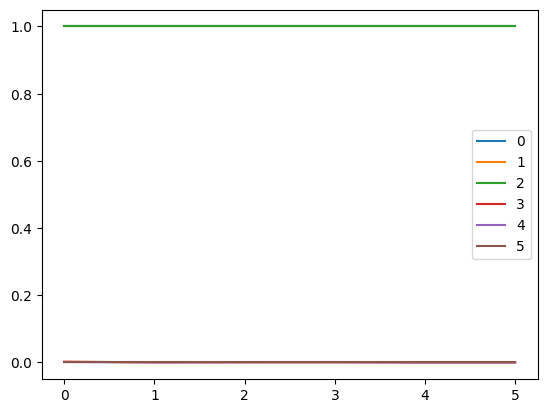

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Curves and their results
#curves = ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves = ['Precision-Recall(B)']
data = np.array([[          1,           1,           1,   0.0023741,   0.0011871,           0],
       [          1,           1,           1,  0.00033754,  0.00016877,           0],
       [          1,           1,           1,  0.00071364,  0.00035682,           0],
       [          1,           1,           1,  0.00081882,  0.00040941,           0],
       [          1,           1,           1,  2.0395e-05,  1.0198e-05,           0],
       [          1,           1,           1,  0.00010257,  5.1283e-05,           0]])
           

df = pd.DataFrame(data)



df.plot()

In [39]:

#confidence f1
data = np.array([[0.14717, 0.14721, 0.17868],[0.057023,0.057039,0.07385  ],
      [   0.088545,    0.088565,     0.11361],
     [   0.093741,    0.093781,     0.12776],
     [   0.012739,    0.012739,    0.017586],
      [   0.028198,    0.028201,    0.043788]])

df1 = pd.DataFrame(data)

file_name = 'max3.xlsx'

df1.to_excel(file_name)

df1

,0,1,2
0,0.147170,0.147210,0.178680
1,0.057023,0.057039,0.073850
2,0.088545,0.088565,0.113610
3,0.093741,0.093781,0.127760
4,0.012739,0.012739,0.017586
5,0.028198,0.028201,0.043788


<Axes: >

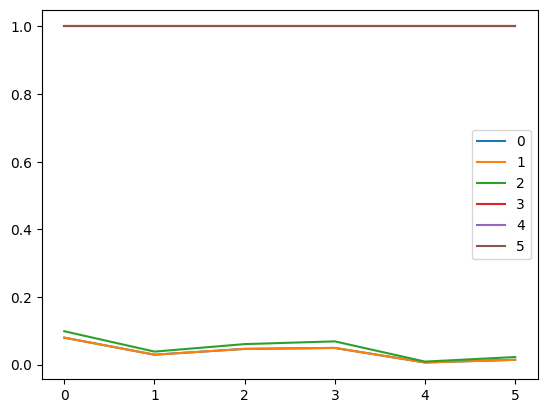

In [59]:
#confidence precision

data = np.array([[   0.079887,    0.079914,    0.098854,1,1, 1],
       [   0.029532,    0.029541,    0.038655,1,    1,       1],
       [   0.046649,     0.04666,    0.060815,1,  1,      1],
       [   0.049511,    0.049533,    0.068888,1, 1, 1],
       [   0.006483,    0.006483,   0.0090859,1, 1,  1],
       [   0.014381,    0.014383,    0.022581,  1, 1,1]])

df1 = pd.DataFrame(data)



df1.plot()

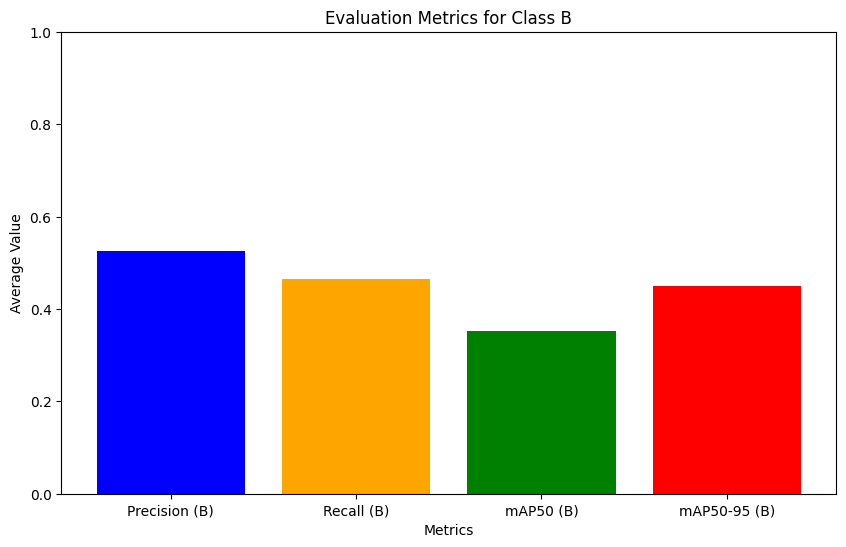

0.5254624999999999

In [81]:
#confidence recall

metrics = ['Precision (B)', 'Recall (B)', 'mAP50 (B)', 'mAP50-95 (B)']
maps = np.array([    0.57324,     0.34208,      0.4409,     0.47907,     0.73802,     0.70093,      0.6897,     0.38658,     0.26594,     0.27487,     0.68339,     0.68281,     0.50929,     0.26549,     0.34746,     0.72767,     0.67203,     0.61974,     0.54565,     0.56439,     0.67062,       0.741,       0.717,     0.73187,
           0.16163,     0.44277,     0.16147,     0.34271,     0.44534,     0.69607,     0.25797,     0.39346,     0.42181,     0.46138,     0.33581,     0.38526,     0.57251,     0.41099,      0.5372,     0.38712,     0.37055,     0.43694,     0.38758,     0.19571,     0.18755,     0.45481,     0.26722,     0.18038,
           0.39791,     0.29434,      0.2296,     0.22787,      0.4115,     0.56447,     0.44868,     0.39095,     0.33707,     0.49955,     0.28584,     0.46255,     0.33464,     0.67761,     0.60577,     0.64869,     0.61309,     0.30953,     0.55565,      0.3697,     0.61711,     0.41161,     0.60823,     0.39842,
           0.64447,      0.1368,     0.50305,     0.38804,     0.34969,     0.51487,    0.051131,     0.24024])


precision_avg = maps[:len(maps)//4].mean()
recall_avg = maps[len(maps)//4:len(maps)//2].mean()
map50_avg = maps[len(maps)//2:3*len(maps)//4].mean()
map50_95_avg = maps[3*len(maps)//4:].mean()

# Create a list of averages
averages = [precision_avg, recall_avg, map50_avg, map50_95_avg]
plt.figure(figsize=(10, 6))
plt.bar(metrics, averages, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.title('Evaluation Metrics for Class B')
plt.ylim(0, 1)  # Since precision, recall, and mAP values range between 0 and 1
plt.show()

precision_avg

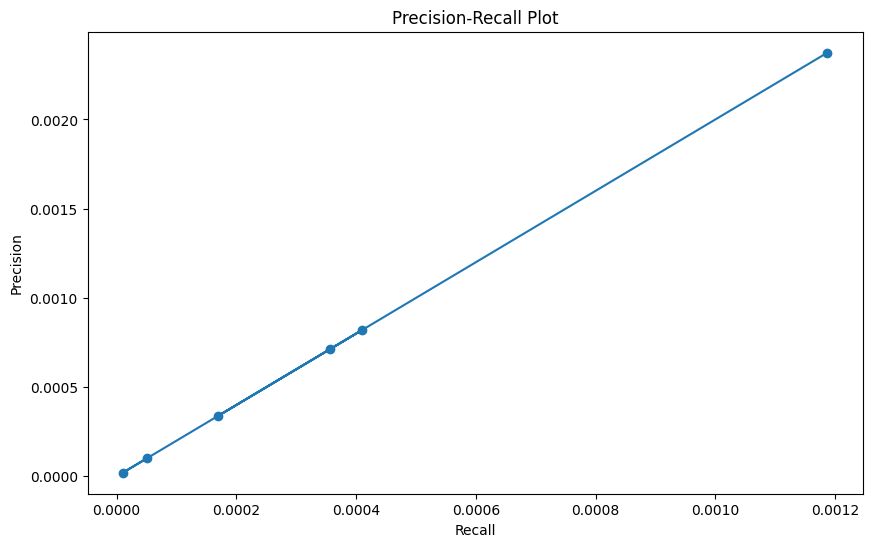

Results have been saved to max1.xlsx


In [74]:
import numpy as np
import pandas as pd

# Example array (shortened for illustration)
results_array = np.array([
    [1, 1, 1, 0.0023741, 0.0011871, 0],
    [1, 1, 1, 0.00033754, 0.00016877, 0],
    [1, 1, 1, 0.00071364, 0.00035682, 0],
    [1, 1, 1, 0.00081882, 0.00040941, 0],
    [1, 1, 1, 2.0395e-05, 1.0198e-05, 0],
    [1, 1, 1, 0.00010257, 5.1283e-05, 0]
])

# Convert the array to a DataFrame
df = pd.DataFrame(results_array, columns=['Metric1', 'Metric2', 'Metric3', 'Metric4', 'Metric5', 'Metric6'])

# Save DataFrame to an Excel file
file_name = 'max1.xlsx'
df.to_excel(file_name, index=False)

df
import matplotlib.pyplot as plt

# Example values for precision and recall (shortened for illustration)
precision = [0.0023741, 0.00033754, 0.00071364, 0.00081882, 2.0395e-05, 0.00010257]
recall = [0.0011871, 0.00016877, 0.00035682, 0.00040941, 1.0198e-05, 5.1283e-05]

# Plotting Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='o')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Plot')
plt.show()

print(f"Results have been saved to {file_name}")



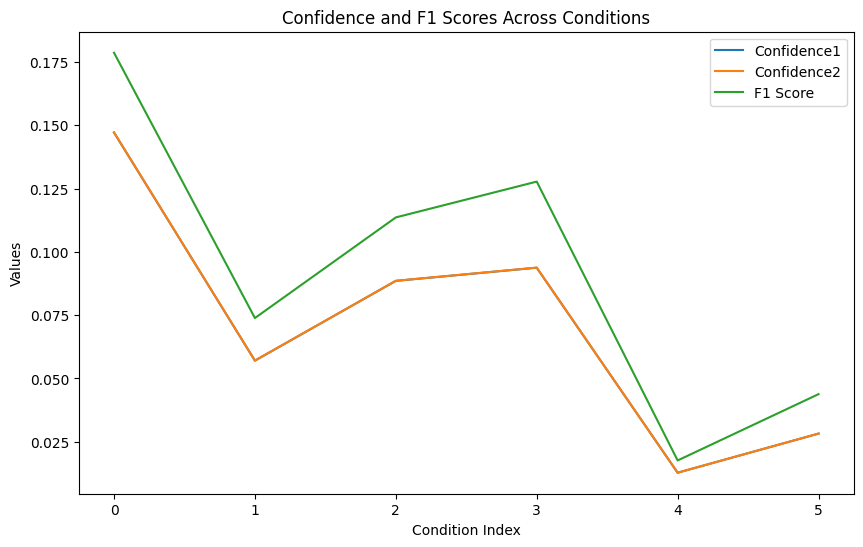

In [78]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example array (shortened for illustration)
results_array = np.array([
    [0.14717, 0.14721, 0.17868, 0, 0, 0],
    [0.057023, 0.057039, 0.07385, 0, 0, 0],
    [0.088545, 0.088565, 0.11361, 0, 0, 0],
    [0.093741, 0.093781, 0.12776, 0, 0, 0],
    [0.012739, 0.012739, 0.017586, 0, 0, 0],
    [0.028198, 0.028201, 0.043788, 0, 0, 0]
])

# Convert the array to a DataFrame
df = pd.DataFrame(results_array, columns=['Confidence1', 'Confidence2', 'F1', 'Metric4', 'Metric5', 'Metric6'])
file_name = 'max2.xlsx'
df.to_excel(file_name, index=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Confidence1'], label='Confidence1')
plt.plot(df.index, df['Confidence2'], label='Confidence2')
plt.plot(df.index, df['F1'], label='F1 Score')
plt.xlabel('Condition Index')
plt.ylabel('Values')
plt.title('Confidence and F1 Scores Across Conditions')
plt.legend()
plt.show()


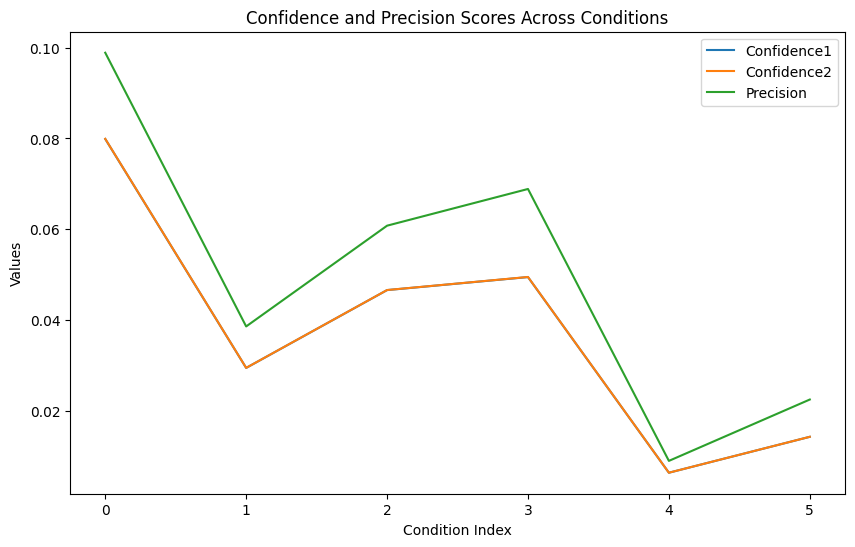

In [79]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example array (shortened for illustration)
results_array = np.array([
    [0.079887, 0.079914, 0.098854, 1, 1, 1],
    [0.029532, 0.029541, 0.038655, 1, 1, 1],
    [0.046649, 0.04666, 0.060815, 1, 1, 1],
    [0.049511, 0.049533, 0.068888, 1, 1, 1],
    [0.006483, 0.006483, 0.0090859, 1, 1, 1],
    [0.014381, 0.014383, 0.022581, 1, 1, 1]
])

# Convert the array to a DataFrame
df = pd.DataFrame(results_array, columns=['Confidence1', 'Confidence2', 'Precision', 'Metric4', 'Metric5', 'Metric6'])
file_name = 'max3.xlsx'
df.to_excel(file_name, index=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Confidence1'], label='Confidence1')
plt.plot(df.index, df['Confidence2'], label='Confidence2')
plt.plot(df.index, df['Precision'], label='Precision')
plt.xlabel('Condition Index')
plt.ylabel('Values')
plt.title('Confidence and Precision Scores Across Conditions')
plt.legend()
plt.show()


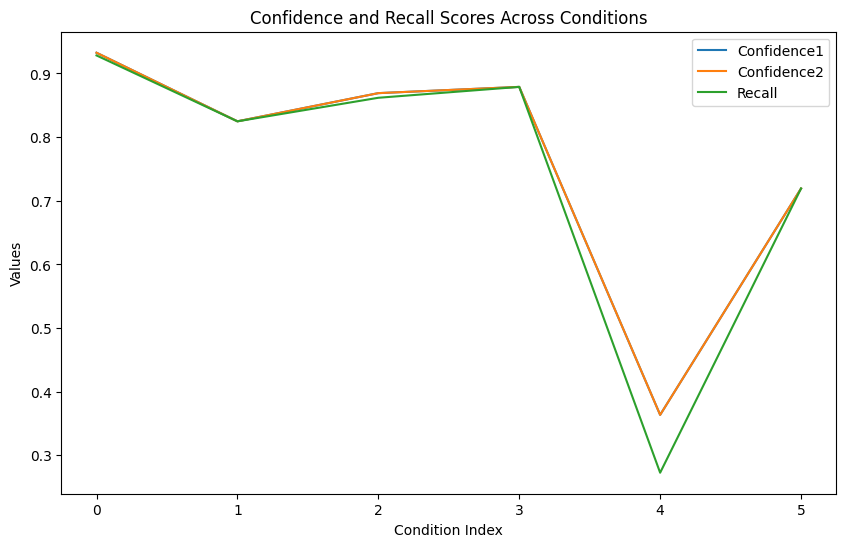

In [80]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example array (shortened for illustration)
results_array = np.array([
    [0.93263, 0.93263, 0.92837, 0, 0, 0],
    [0.82484, 0.82484, 0.82484, 0, 0, 0],
    [0.86913, 0.86913, 0.86184, 0, 0, 0],
    [0.87895, 0.87895, 0.87895, 0, 0, 0],
    [0.36364, 0.36364, 0.27273, 0, 0, 0],
    [0.7193,  0.7193,  0.7193,  0, 0, 0]
])

# Convert the array to a DataFrame
df = pd.DataFrame(results_array, columns=['Confidence1', 'Confidence2', 'Recall', 'Metric4', 'Metric5', 'Metric6'])
file_name = 'max4.xlsx'
df.to_excel(file_name, index=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Confidence1'], label='Confidence1')
plt.plot(df.index, df['Confidence2'], label='Confidence2')
plt.plot(df.index, df['Recall'], label='Recall')
plt.xlabel('Condition Index')
plt.ylabel('Values')
plt.title('Confidence and Recall Scores Across Conditions')
plt.legend()
plt.show()


In [ ]:
#signal counter
number_of_cars = len(count_car)
mean_time_headway = 30/(number_of_cars)
flow_rate = 3600/mean_time_headway
Amber = 2

approach_width = 4

saturation_flow = 525*approach_width

Y_ratio = saturation_flow/flow_rate


critical_Y_ratio = Y_ratio

number_of_phases = 2

time_loss = 2

all_red = 4

loss_time_per_cycle = number_of_phases*time_loss + all_red


Total_cycle_length = (1.5*loss_time_per_cycle + 5)/(1-critical_Y_ratio)

green_signal_nb  = round(abs( Y_ratio/critical_Y_ratio *(Total_cycle_length-loss_time_per_cycle)))

red_signal_nb = abs(Total_cycle_length - green_signal_nb - Amber)

   
print(mean_time_headway,number_of_cars,green_signal_nb,red_signal_nb)


In [ ]:
int_to_string = str(green_signal_nb)
print(int_to_string)

In [ ]:
%pip install pyserial

In [ ]:
import serial

ser = serial.Serial(port='COM10',baudrate=9600)

while True:
    value = ser.write(bytes(int_to_string,'utf-8'))
    print(value)


In [ ]:
result_str = str(result)
start_index = result_str.find('cars')
end_index = result_str.find(',', start_index)
num_cars = int(result_str[start_index - 3:start_index - 1])
print(start_index)


In [ ]:
import cv2
import pandas as pd
from ultralytics import YOLO
from tracker import*

model=YOLO('yolov8s.pt')



def RGB(event, x, y, flags, param):
    if event == cv2.EVENT_MOUSEMOVE :  
        colorsBGR = [x, y]
        print(colorsBGR)
        

cv2.namedWindow('RGB')
cv2.setMouseCallback('RGB', RGB)

cap=cv2.VideoCapture(0)


my_file = open("coco.txt", "r")
data = my_file.read()
class_list = data.split("\n") 
#print(class_list)

count=0

tracker=Tracker()
vh = {}
counter = []
cy1=322
cy2=368
offset=6

while True:    
    ret,frame = cap.read()
    if not ret:
        break
    count += 1
    if count % 3 != 0:
        continue
    frame=cv2.resize(frame,(1020,500))
   

    results=model.predict(frame)
 #   print(results)
    a=results[0].boxes.data
    px=pd.DataFrame(a).astype("float")
#    print(px)
    list=[]
             
    for index,row in px.iterrows():
#        print(row)
 
        x1=int(row[0])
        y1=int(row[1])
        x2=int(row[2])
        y2=int(row[3])
        d=int(row[5])
        c=class_list[d]
        if 'car' in c:
            list.append([x1,y1,x2,y2])
    bbox_id=tracker.update(list)
    for bbox in bbox_id:
        x3,y3,x4,y4,id=bbox
        cx=int(x3+x4)//2
        cy=int(y3+y4)//2

        if cy1 < (cy+offset) and cy1>(cy-offset):
            vh[id]=cy
        if id in vh:
            if cy1 < (cy+offset) and cy1>(cy-offset):
                cv2.circle(frame,(cx,cy),4,(0,0,255),-1)
                cv2.putText(frame,str(id),(cx,cy),cv2.FONT_HERSHEY_COMPLEX,0.8,(0,255,255),2)
                if counter.count(id)==0:
                    counter.append(id)
           


    cv2.line(frame,(274,cy1),(814,cy1),(255,255,255),1)
    cv2.line(frame,(177,cy2),(927,cy2),(255,255,255),1)
    number = len(counter)
    cv2.putText(frame,('Number of Cars: ')+ str(number),(60,40),cv2.FONT_HERSHEY_COMPLEX,0.8,(0,255,255),2)
    cv2.imshow("RGB", frame)
    if cv2.waitKey(1)&0xFF==27:
        break
cap.release()
cv2.destroyAllWindows()